In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [3]:
## Read file
df = pd.read_csv('./mutual-funds-india-detailed/comprehensive_mutual_funds_data.csv')

In [4]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [5]:
df.dtypes

scheme_name       object
min_sip            int64
min_lumpsum        int64
expense_ratio    float64
fund_size_cr     float64
fund_age_yr        int64
fund_manager      object
sortino           object
alpha             object
sd                object
beta              object
sharpe            object
risk_level         int64
amc_name          object
rating             int64
category          object
sub_category      object
returns_1yr      float64
returns_3yr      float64
returns_5yr      float64
dtype: object

In [6]:
## Check for missing values
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [7]:
## It's observed manually from the file that some of the blanks are not identified, as blanks are filled with '-'
## To identify  the actual number of blanks, below is the code

df = df.replace('-',np.nan)
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino           23
alpha             42
sd                24
beta              42
sharpe            23
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [8]:
obj_cols = ['sortino', 'alpha', 'sd','beta', 'sharpe']
df[obj_cols] = df[obj_cols].astype(float)
df[obj_cols].mean(axis = 0, skipna = True)

sortino     2.652642
alpha       2.505635
sd         10.272696
beta        0.822241
sharpe      1.204185
dtype: float64

In [9]:
## Replace blanks with mean values of the above cols
df[obj_cols] = df[obj_cols].fillna(df[obj_cols].mean(axis = 0, skipna = True))

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
min_sip,814.0,528.500000,369.184517,0.00,150.0000,500.000,1000.0000,2000.00
min_lumpsum,814.0,3047.468059,2514.619513,0.00,500.0000,5000.000,5000.0000,25000.00
expense_ratio,814.0,0.713231,0.482161,0.00,0.3100,0.615,1.0300,2.59
fund_size_cr,814.0,3812.854214,7181.479475,2.38,175.2500,940.500,3819.0000,57052.00
fund_age_yr,814.0,8.319410,2.640622,1.00,6.0000,10.000,10.0000,17.00
sortino,814.0,2.652642,1.372393,-1.77,1.8100,2.810,3.4600,12.57
alpha,814.0,2.505635,3.848149,-13.36,0.5700,2.040,3.7275,27.24
sd,814.0,10.272696,7.689592,0.27,2.2225,11.785,16.3975,77.72
beta,814.0,0.822241,1.275588,-31.86,0.7100,0.850,0.9600,5.40
sharpe,814.0,1.204185,0.528789,-0.82,0.9325,1.290,1.5400,3.52


In [11]:
## There are 3 features 'returns_1yr', 'returns_3yr','returns_5yr' giving us the idea about the 
## performance of a fund. Let's create a new column giving the average return of the three year returns.

df['overall_return'] =  df[['returns_1yr', 'returns_3yr','returns_5yr']].mean(axis=1).round(1)

In [12]:
## Let's create a categorical column for the 'overall_return'
## For eg. if the overall return has return 6.7%, let's tag it as "Less than 10%"

def return_group(x):
    if (x<=10):
        return 'Less than 10%'
    elif ((x>10) & (x<=20)):
        return '10% to 20%'
    else:
        return 'Higher than 20%'
    
df['return_group'] = df['overall_return'].apply(return_group)
df[['overall_return','return_group']].head()

,overall_return,return_group
0,5.8,Less than 10%
1,5.3,Less than 10%
2,10.2,10% to 20%
3,8.2,Less than 10%
4,10.9,10% to 20%


# Correlation of numerical features

In [13]:
numeric_features = df.select_dtypes(include = 'number')

numeric_features2 = numeric_features.drop(columns = ['returns_1yr', 'returns_3yr','returns_5yr'])

correlation = numeric_features2.corr()

print(correlation['overall_return'].sort_values(ascending = False))

overall_return    1.000000
sd                0.746243
risk_level        0.670668
sharpe            0.541430
alpha             0.488816
expense_ratio     0.422197
sortino           0.400345
fund_age_yr       0.067284
fund_size_cr      0.020573
rating            0.005839
min_lumpsum      -0.027091
min_sip          -0.192928
beta             -0.208518
Name: overall_return, dtype: float64


## Heat Map on numerical features

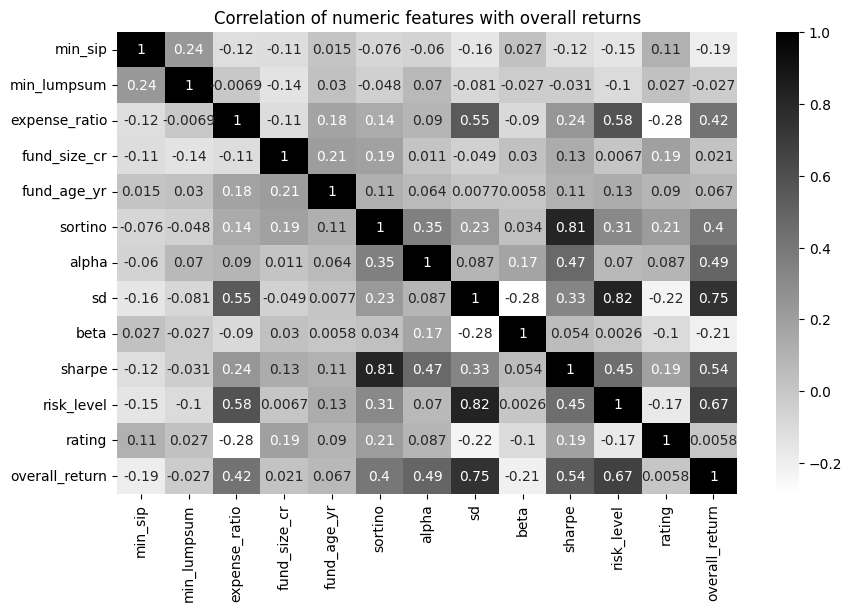

In [14]:
plt.figure(figsize = (10,6))
plt.title('Correlation of numeric features with overall returns')
sns.heatmap(correlation, annot = True, cmap="binary")
plt.show()

Observation from the above heat map:

* sd is 0.75 -- good correlation with average return
* sortino and sharpe 0.81 -- multicollinear 

# Visual representation of the good correlation features with the average return.

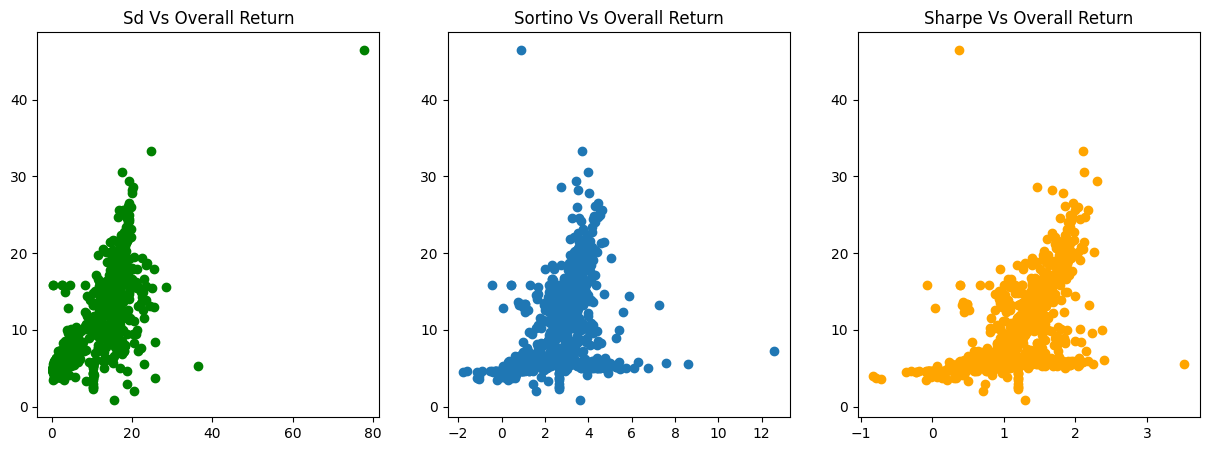

In [15]:
figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].scatter(df['sd'], df['overall_return'],color='green')
axis[0].set_title("Sd Vs Overall Return")
  

axis[1].scatter(df['sortino'], df['overall_return'])
axis[1].set_title("Sortino Vs Overall Return")
  

axis[2].scatter(df['sharpe'], df['overall_return'],color='orange')
axis[2].set_title("Sharpe Vs Overall Return")
  
    
plt.show()

Observation from tha above scatter plots:

* It seems that fund with high standard deviation have the probability of gaining higher returns.

* Same for sortino & sharpe as well but there seem to be some outliers as well.

# Top performing Funds based on Average Returns

In [16]:
@interact
def recomd_funds(return_group = list(df['return_group'].unique()),Top = list([10,20,30,40,50,100,500])):
    a = df[df['return_group'] == return_group][['scheme_name', 'returns_1yr','returns_3yr','returns_5yr','overall_return']]
    a = a.sort_values(by = 'overall_return', ascending = False)
    n = a.scheme_name.count()
    print('{} funds found: \nTop {} funds giving returns {} listed below:'.format(n,Top,return_group))
    return a.set_index('scheme_name')[:Top]

interactive(children=(Dropdown(description='return_group', options=('Less than 10%', '10% to 20%', 'Higher tha…

# Top performing Funds based on Rating

In [17]:
@interact
def recomd_funds_rating(rating = list(df['rating'].sort_values(ascending = False).unique()),Top = list([10,20,30,40,50,100,500])):
    a = df[df['rating'] == rating][['scheme_name','rating', 'returns_1yr','returns_3yr','returns_5yr','overall_return'
                                   ,'fund_size_cr','fund_age_yr','sortino','alpha','sd','beta','sharpe']]
    a = a.sort_values(by = 'overall_return', ascending = False)
    n = a.scheme_name.count()
    print('{} funds found: \nTop {} funds giving rating {} listed below:'.format(n,Top,rating))
    return a.set_index('scheme_name')[:Top]

interactive(children=(Dropdown(description='rating', options=(5, 4, 3, 2, 1, 0), value=5), Dropdown(descriptio…

# Top performing Funds based on Standard Deviation

In [18]:
@interact
def recomd_funds_rating(Top = list([10,20,30,40,50])):
    a = df[['scheme_name','sd', 'overall_return','returns_1yr','returns_3yr','returns_5yr','rating',
            'sortino','alpha','beta','sharpe']]
    a = a.sort_values(by = 'sd', ascending = False)
    n = a.scheme_name.count()
    print('Top {} funds having sd value sorted in descending order listed below:'.format(Top))
    return a.set_index('scheme_name')[:Top]

interactive(children=(Dropdown(description='Top', options=(10, 20, 30, 40, 50), value=10), Output()), _dom_cla…

# Fund performance at Category level

/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


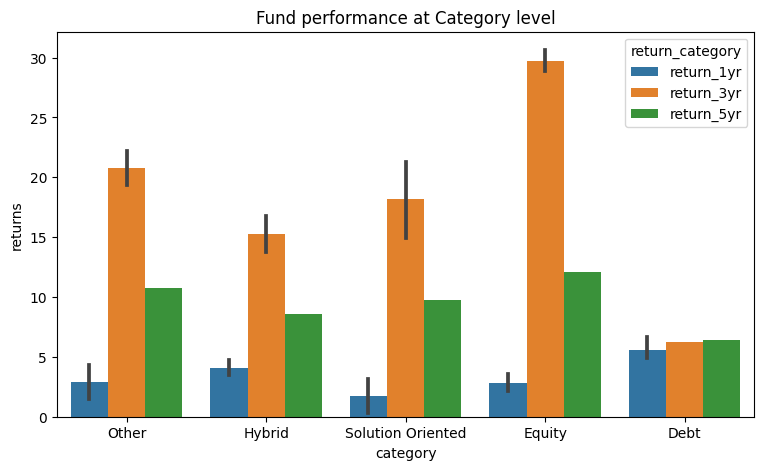

In [19]:
return_1yr = df.drop(columns = ['returns_3yr','returns_5yr']).rename(columns = {'returns_1yr':'returns'})
return_1yr['return_category'] = 'return_1yr'
return_3yr = df.drop(columns = ['returns_1yr','returns_5yr']).rename(columns = {'returns_3yr':'returns'})
return_3yr['return_category'] = 'return_3yr'
return_5yr = df.drop(columns = ['returns_1yr','returns_3yr']).rename(columns = {'returns_5yr':'returns'})
return_5yr['return_category'] = 'return_5yr'

df_concat = pd.concat([return_1yr,return_3yr,return_5yr])

plt.figure(figsize = (9,5))
sns.barplot(df_concat,x='category',y='returns',hue='return_category',estimator = np.mean)
plt.title('Fund performance at Category level')
plt.show()

* From the above chart, Equity category funds gives the highest returns.

# Fund performance at risk level

/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


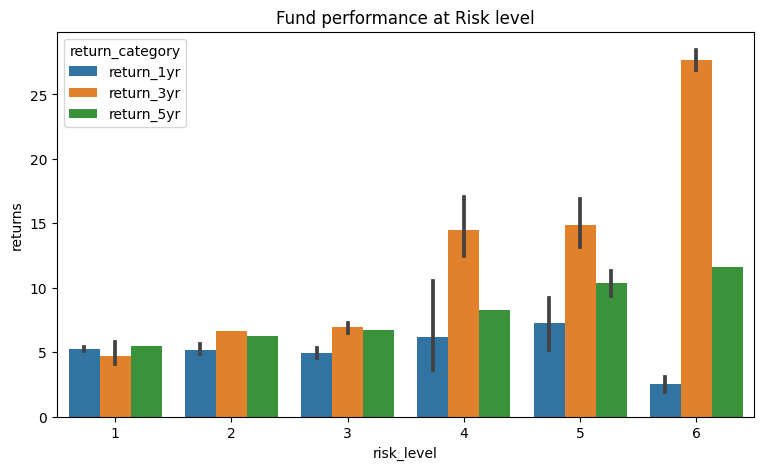

In [20]:
plt.figure(figsize = (9,5))
sns.barplot(df_concat,x='risk_level',y='returns',hue='return_category',estimator = np.mean)
plt.title('Fund performance at Risk level')
plt.show()

* From the above charts, it is observed that funds give highest returns at 3rd year.
* Return increases as risk increases.
* It can be advised that investors should atleast invest for 3 years in a fund.

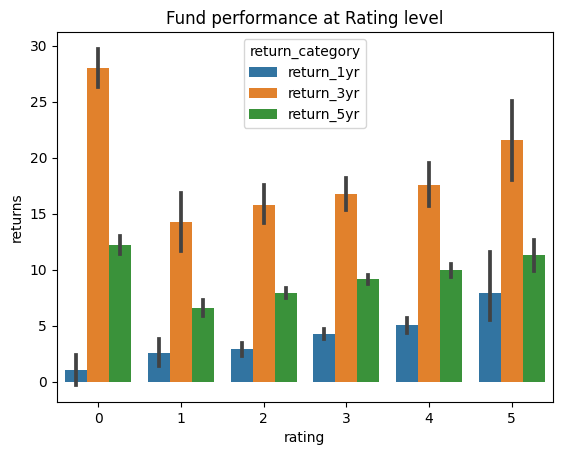

In [21]:
sns.barplot(df_concat,x='rating',y='returns',hue='return_category')
plt.title('Fund performance at Rating level')
plt.show()

It is observed from the above chart that the return increases as per the rating of the funds increase. 

However, we also see at rating 0, the return is highest among all for 3rd & 5th year. 

Let's find out WHY??

In [22]:
# Fetch total number of funds at rating level
df2=df.groupby(['rating'])['scheme_name'].agg('count')
df2

rating
0    108
1     58
2    168
3    243
4    158
5     79
Name: scheme_name, dtype: int64

In [23]:
# Fetch total number of funds at rating level
df3=df.groupby(['category','rating'])['scheme_name'].agg('count')
df4 = pd.DataFrame(df3).reset_index().rename(columns={'scheme_name':'no. of funds'})
df4

,category,rating,no. of funds
0,Debt,0,4
1,Debt,1,22
2,Debt,2,66
3,Debt,3,96
4,Debt,4,64
5,Debt,5,30
6,Equity,0,78
7,Equity,1,18
8,Equity,2,54
9,Equity,3,76


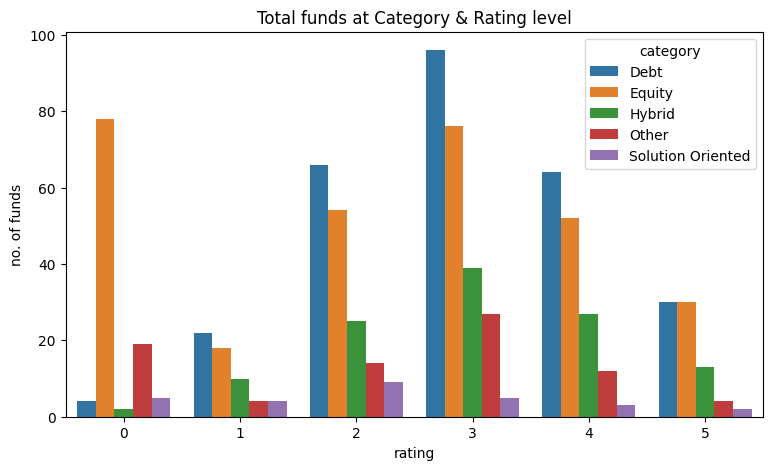

In [24]:
plt.figure(figsize = (9,5))
sns.barplot(df4,x='rating',y='no. of funds',hue='category')
plt.title('Total funds at Category & Rating level')
plt.show()

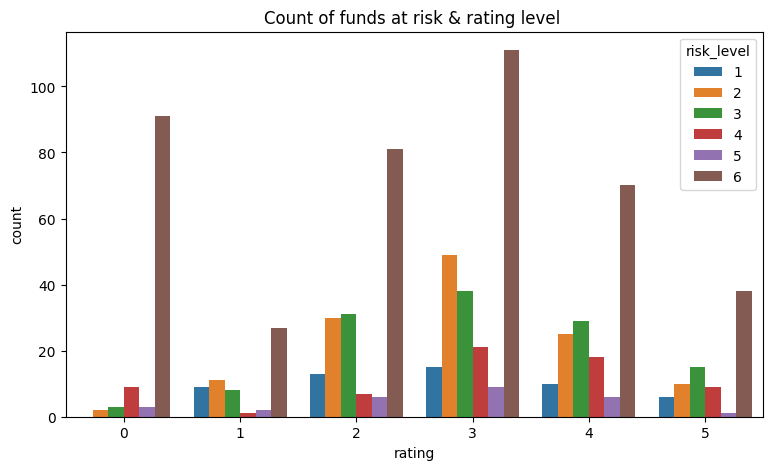

In [25]:
plt.figure(figsize = (9, 5))
sns.countplot(x = 'rating', data = df, hue = 'risk_level')
plt.title('Count of funds at risk & rating level ')
plt.show()

## Insights:

From the above charts named below

    Fig - 1: 'Fund performance at Rating level'
    Fig - 2: 'Total funds at Category & Rating level'
    Fig - 3: 'Count of funds at risk & rating level' 
    
    
* It can be seen that, in rating 0 funds, 90% of the mutual funds have risk level at 6 i.e. their components are of Very High Risk (Fig - 3), & of Equity category which are also high risk (Fig - 2). 

* Also from Fig - 1, it's seen that some funds have returned less than 0% in first year i.e. fund was in loss for first year due to which investors would have lost faith at a very early stage itself in the funds even though they would have returned good profit
in the 3rd year. Hence, they were rated 0 means not rated itself. But they proved to return highest among other rated funds later.

* Hence, it can be advisable to the investors to invest for atleast 3 years in any fund for good returns.